## **Desarrollo Parte 1**

1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de
White patch.

In [5]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [6]:
def show_hist(b,g,r):
    # Calcular histogramas con np.histogram
    hist_b, bins_b = np.histogram(b, bins=256, range=(0, 256))
    hist_g, bins_g = np.histogram(g, bins=256, range=(0, 256))
    hist_r, bins_r = np.histogram(r, bins=256, range=(0, 256))

    # Graficar
    plt.figure(figsize=(12, 5))
    plt.plot(hist_b, color='blue', label='Azul')
    plt.plot(hist_g, color='green', label='Verde')
    plt.plot(hist_r, color='red', label='Rojo')
    plt.title("Histogramas por canal de color")
    plt.xlabel("Nivel de intensidad")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
def get_new_pixel(value, max_v, p_98):
    if max_v == 255:
        max_v = p_98
    return min(255, int((255/ max_v) * value))

def white_patch(img):
    img_modificada = img.copy()
    b, g, r = cv.split(img_modificada)

    max_b = np.max(b)
    max_g = np.max(g)
    max_r = np.max(r)
    print(f"Maximos: {max_b}, {max_g}, {max_r}")

    p98_b = np.percentile(b, 98)
    p98_g = np.percentile(g, 98)
    p98_r = np.percentile(r, 98)
    print(f"Percentiles 98: {p98_b}, {p98_g}, {p98_r}")

    for fila in range(img.shape[0]):
        for col in range(img.shape[1]):
            img_modificada[fila, col, 0] = get_new_pixel(img_modificada[fila, col, 0], max_b, p98_b)
            img_modificada[fila, col, 1] = get_new_pixel(img_modificada[fila, col, 1], max_g, p98_g)
            img_modificada[fila, col, 2] = get_new_pixel(img_modificada[fila, col, 2], max_r, p98_r)
    return img_modificada

In [10]:
sorted(os.listdir('.'))

['procesadas',
 'test_blue.png',
 'test_green.png',
 'test_red.png',
 'white-patch.ipynb',
 'wp_blue.jpg',
 'wp_green.png',
 'wp_green2.jpg',
 'wp_red.png',
 'wp_red2.jpg']

Procesando: test_blue.png


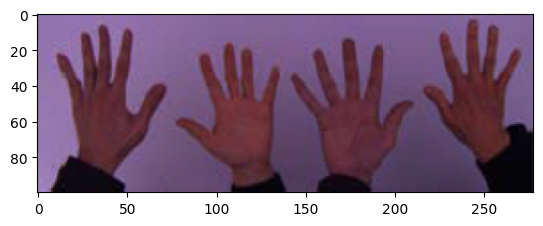

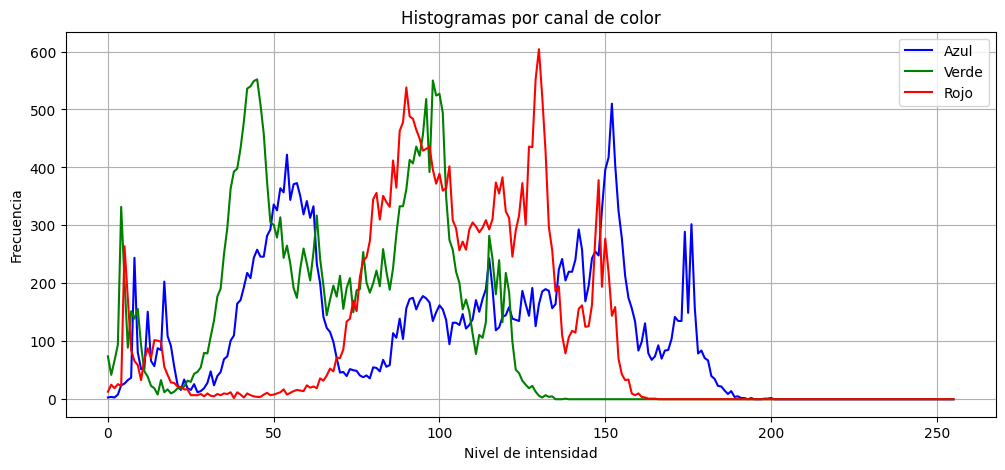

Maximos: 200, 138, 165
Percentiles 98: 177.0, 120.0, 151.0


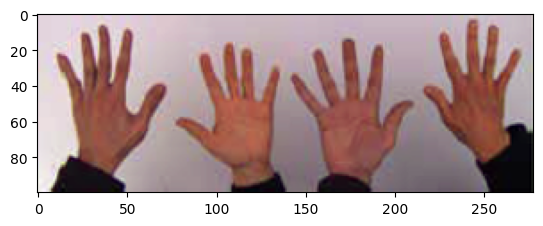

Procesando: test_green.png


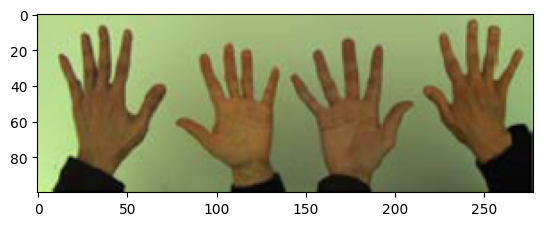

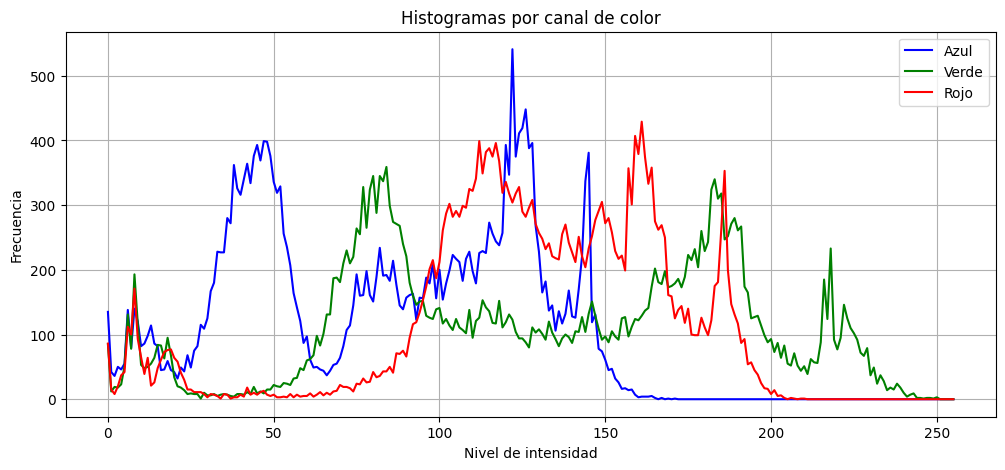

Maximos: 171, 250, 210
Percentiles 98: 147.0, 226.0, 190.0


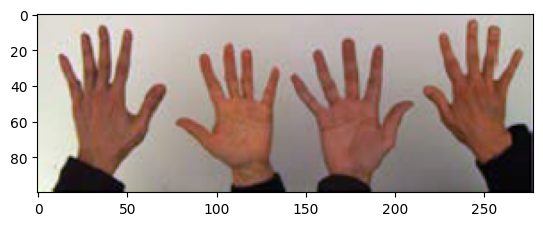

Procesando: test_red.png


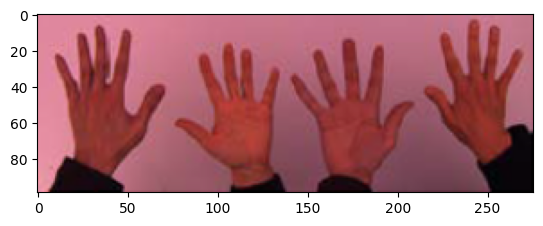

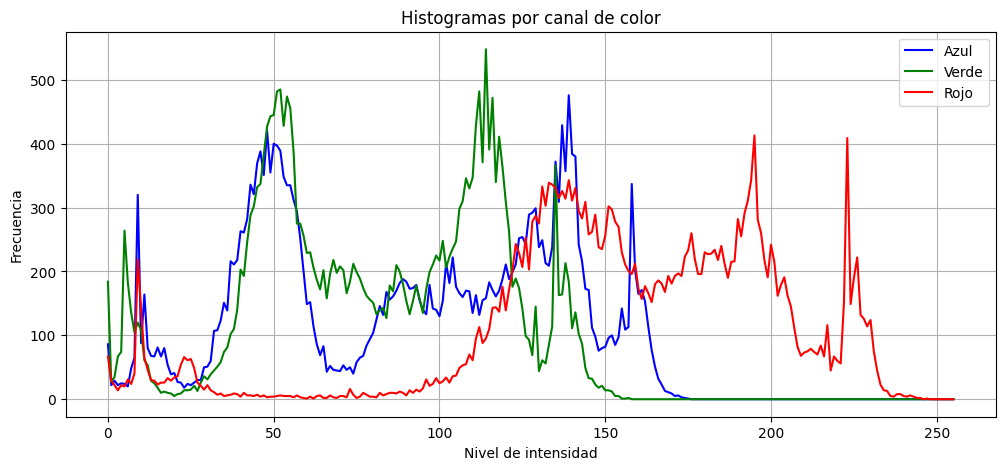

Maximos: 175, 157, 247
Percentiles 98: 161.0, 141.0, 228.0


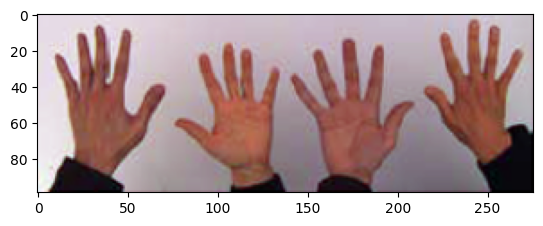

Procesando: wp_blue.jpg


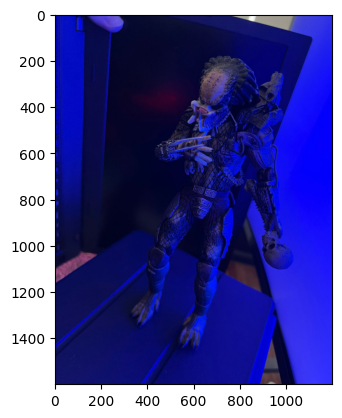

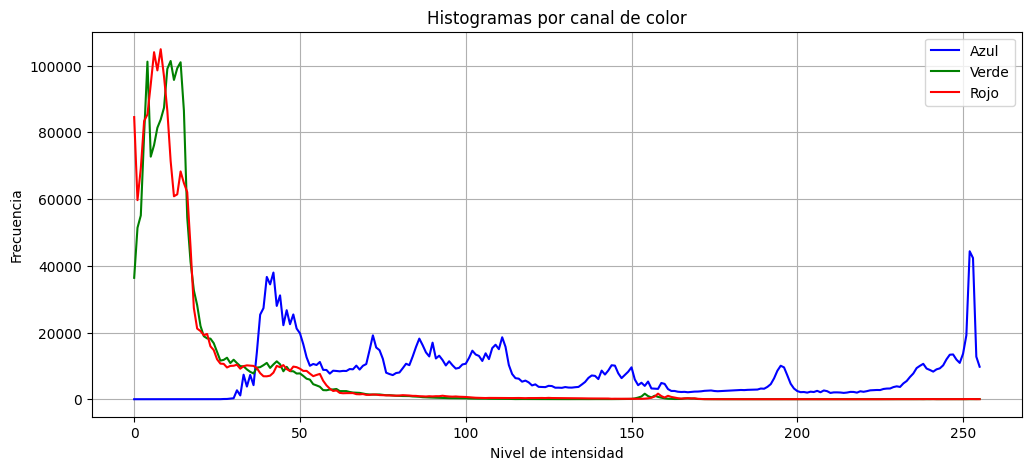

Maximos: 255, 255, 255
Percentiles 98: 253.0, 69.0, 86.0


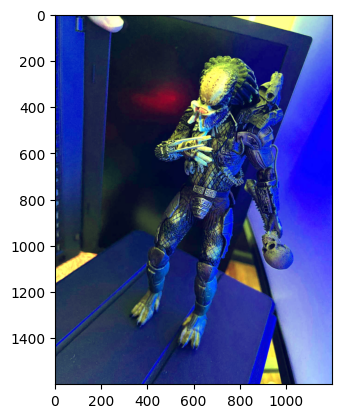

Procesando: wp_green.png


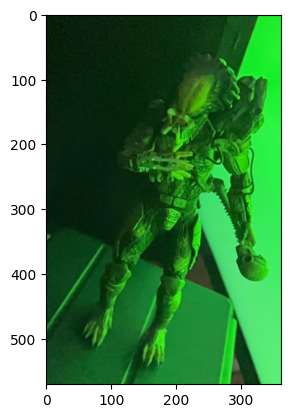

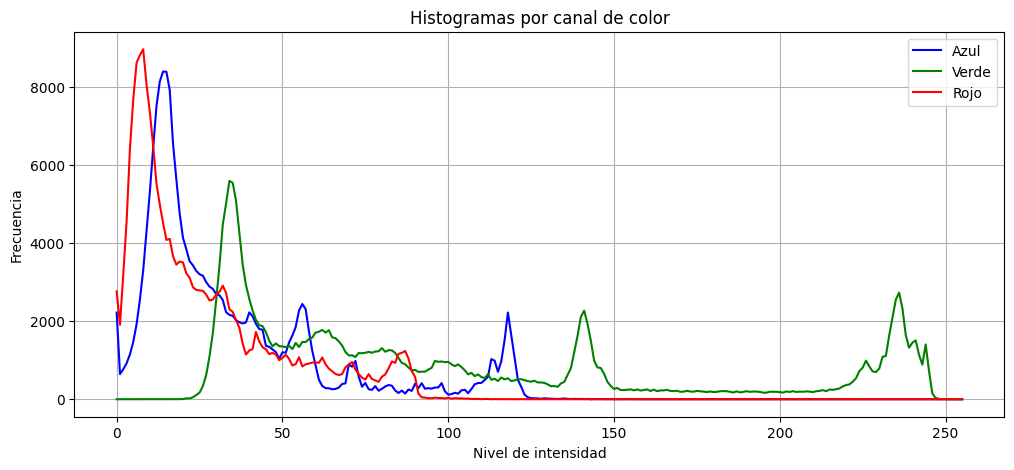

Maximos: 155, 252, 126
Percentiles 98: 118.0, 242.0, 87.0


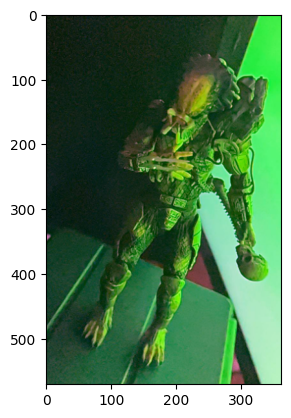

Procesando: wp_green2.jpg


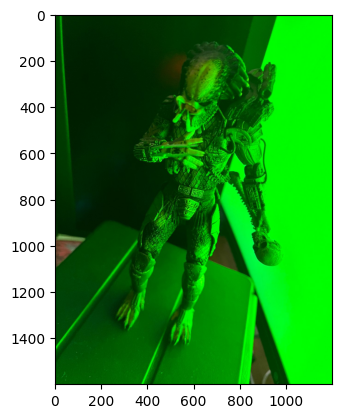

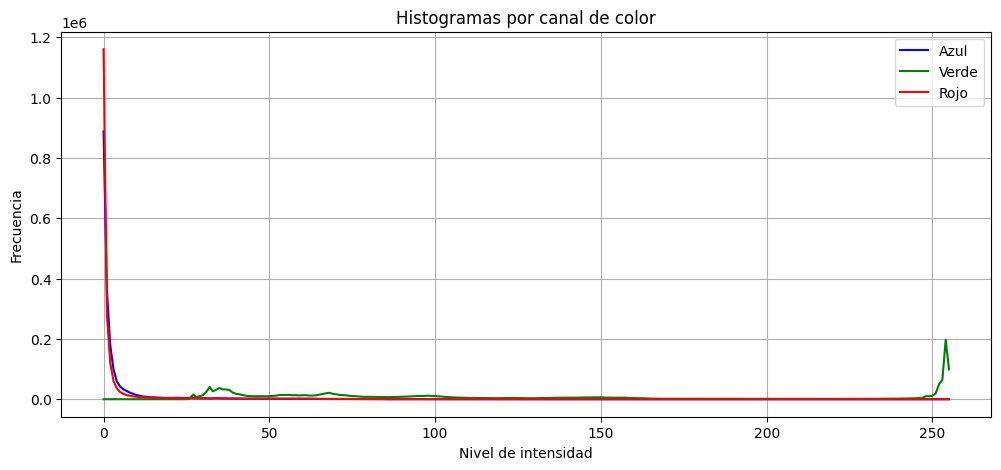

Maximos: 172, 255, 170
Percentiles 98: 44.0, 255.0, 58.0


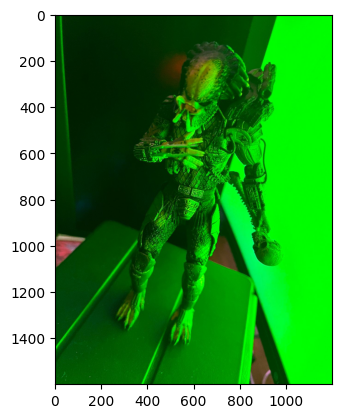

Procesando: wp_red.png


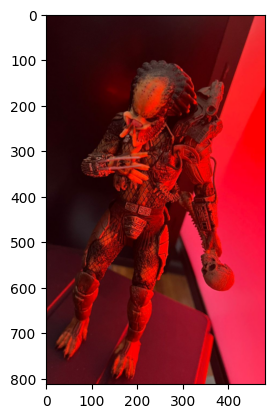

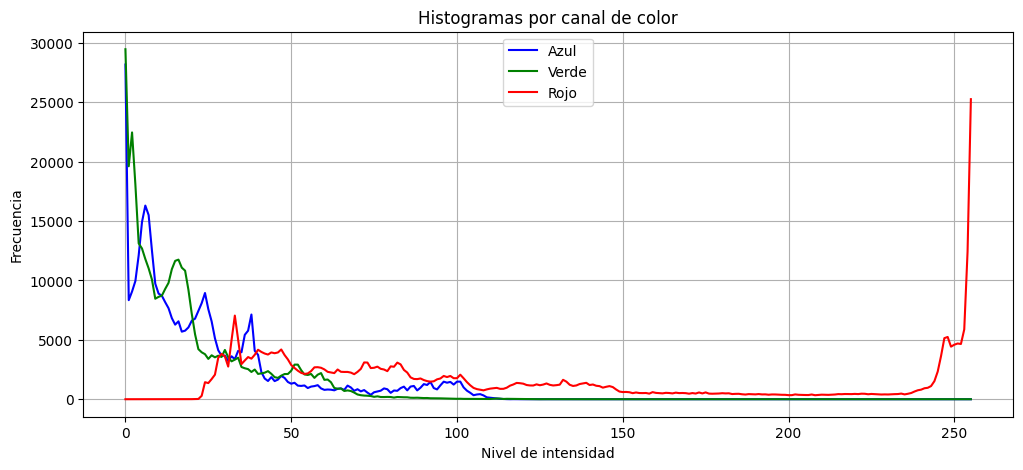

Maximos: 122, 134, 255
Percentiles 98: 99.0, 66.0, 255.0


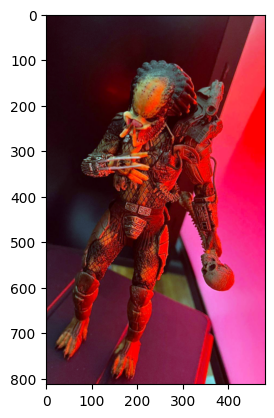

Procesando: wp_red2.jpg


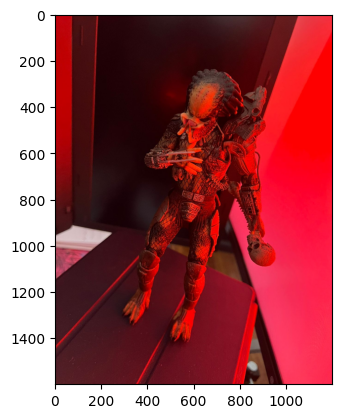

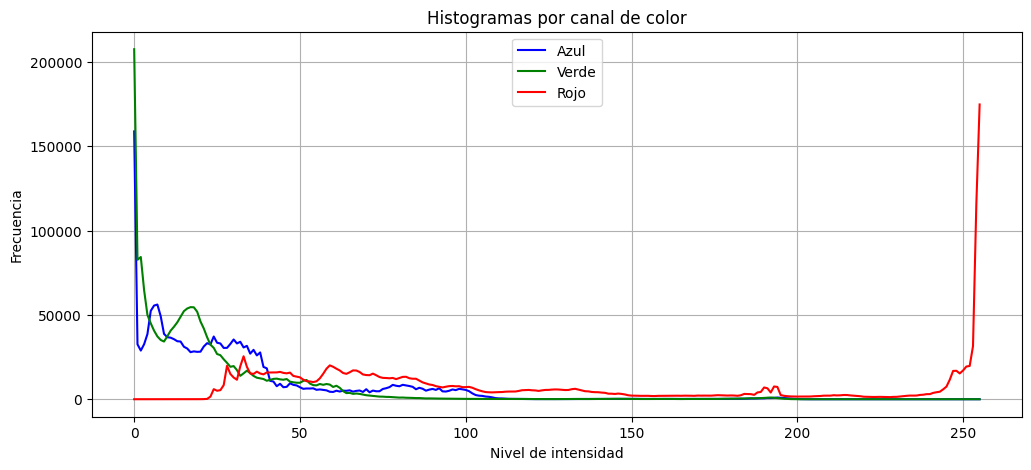

Maximos: 203, 201, 255
Percentiles 98: 101.0, 76.0, 255.0


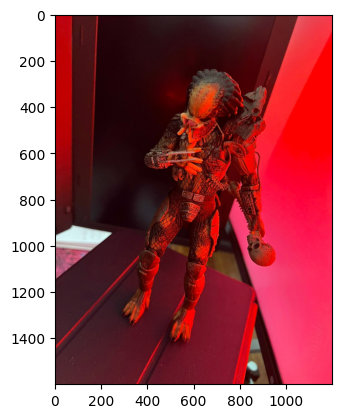

In [11]:
# Extensiones permitidas
extensiones = ('.jpg', '.png')

# Crear carpeta si no existe
output_dir = "procesadas"
os.makedirs(output_dir, exist_ok=True)

# Iterar sobre los archivos del directorio actual
for archivo in sorted(os.listdir('.')):
    if archivo.lower().endswith(extensiones):
        print(f"Procesando: {archivo}")
        img = cv.imread(archivo)

        if img is None:
            print(f"⚠️ No se pudo leer {archivo}")
            continue
        
        # Mustro la imagen original
        plt.figure()
        plt.imshow(img[:,:,::-1])
        plt.show()

        #Mostramos el histograma de la imagen original
        b, g, r = cv.split(img)
        show_hist(b, g, r)

        # Aplicar white patch
        new_img = white_patch(img)
        # Mostramos imagen corregida
        plt.figure()
        plt.imshow(new_img[:,:,::-1])
        plt.show()

        # Construir ruta de salida
        output_path = os.path.join(output_dir, f"procesado_{archivo}")

        # Guardar imagen
        cv.imwrite(output_path, new_img)

## **Conclusiones**

Viendo los resultados obtenidos, podemos encontrar que en las imágenes de las manos fue posible recuperar la imagen original aplicando el algoritmo de white-patch en todos los casos. En cambio, si vemos los resultados obtenidos para las imágenes de los depredator encontramos en algunos casos no se pudo recuperar tan bien la imagen original con white-patch. La causa de esto es posible verla en los histogramas que realizamos acompañando a cada imagen, donde vemos que las imágenes en las que el algoritmo tuvo el peor desempeño (wp_green2, wp_red2) hay una alta saturación del resto de canales alrededor del valor 0. En esos casos, el algoritmo white-patch solo está haciendo una multiplicación por 0 quedandonos solamente el color del canal que no fuera 0, el cual coincidía con el color de la luz aplicada. Además, se puede destacar que usar el percentil 98 cuando el máximo del canal es 255 es un técnica bastante efectiva para evitar saturación de las imágenes.